In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pour un affichage plus propre
sns.set(style="whitegrid")

df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


# Pour un affichage plus propre
sns.set(style="whitegrid")


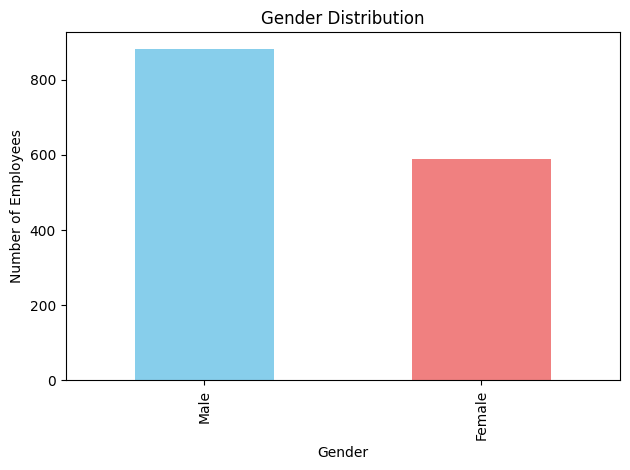

In [ ]:
import matplotlib.pyplot as plt
gender_counts = df['Gender'].value_counts()
ax = gender_counts.plot(kind='bar', title='Gender Distribution', color=['skyblue', 'lightcoral'])
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Employees')
plt.tight_layout()
plt.show()


## 📌 1. Gender Distribution

The gender distribution reveals a higher number of male employees compared to female employees in the dataset.

**Insight:**  
💡 Any gender-based analysis must take this imbalance into account. A higher number of males could affect overall attrition and compensation trends.


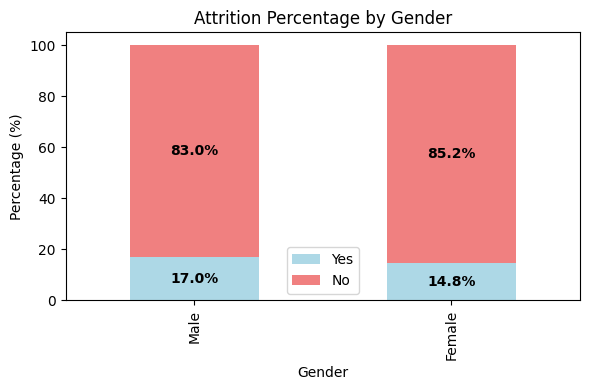

In [ ]:
# 📌 Exploration 2 – Attrition Percentage by Gender

# Prepare percentage data
total_per_gender = df['Gender'].value_counts()
attrition_counts = df[df['Attrition'] == 'Yes']['Gender'].value_counts()
no_attrition_counts = df[df['Attrition'] == 'No']['Gender'].value_counts()

# Combine into percentage DataFrame
plot_df = pd.DataFrame({
    'Yes': (attrition_counts / total_per_gender * 100).round(1),
    'No': (no_attrition_counts / total_per_gender * 100).round(1)
}).fillna(0)[['Yes', 'No']]

# Reset for plotting
plot_df_percent = plot_df.reset_index().rename(columns={'index': 'Gender'})

# Plot stacked bar chart with percentage annotations
ax = plot_df_percent.set_index('Gender').plot(
    kind='bar',
    stacked=True,
    color=['lightblue', 'lightcoral'],
    figsize=(6, 4)
)

plt.title('Attrition Percentage by Gender')
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')

# Add percentage labels on each bar
for index, row in plot_df_percent.iterrows():
    ax.text(index, row['Yes']/2, f"{row['Yes']}%", ha='center', va='center', color='black', fontweight='bold')
    ax.text(index, row['Yes'] + row['No']/2, f"{row['No']}%", ha='center', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


## 📌 2. Attrition by Gender

This bar chart compares the number of employees who left (`Attrition = Yes`) across genders.

**Insight:**  
💡 A slightly higher proportion of males left the company compared to females.  
This suggests that gender is **not the most critical factor** influencing attrition — although it can still interact with other variables like role, workload, or tenure.


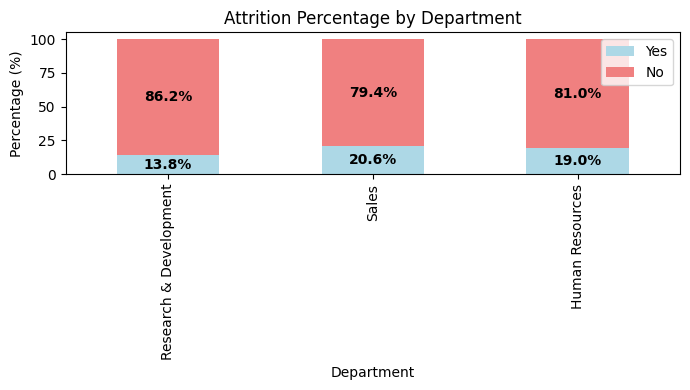

In [ ]:
# 📌 Exploration 3 – Attrition Percentage by Department

# Calculate totals per department
total_per_dept = df['Department'].value_counts()
attrition_counts = df[df['Attrition'] == 'Yes']['Department'].value_counts()
no_attrition_counts = df[df['Attrition'] == 'No']['Department'].value_counts()

# Build percentage DataFrame
plot_df = pd.DataFrame({
    'Yes': (attrition_counts / total_per_dept * 100).round(1),
    'No': (no_attrition_counts / total_per_dept * 100).round(1)
}).fillna(0)[['Yes', 'No']]

# Reset for plotting
plot_df_percent = plot_df.reset_index().rename(columns={'index': 'Department'})

# Plot stacked bar chart with percentages
ax = plot_df_percent.set_index('Department').plot(
    kind='bar',
    stacked=True,
    color=['lightblue', 'lightcoral'],
    figsize=(7, 4)
)

plt.title('Attrition Percentage by Department')
plt.ylabel('Percentage (%)')
plt.xlabel('Department')

# Add percentage labels on bars
for index, row in plot_df_percent.iterrows():
    ax.text(index, row['Yes']/2, f"{row['Yes']}%", ha='center', va='center', color='black', fontweight='bold')
    ax.text(index, row['Yes'] + row['No']/2, f"{row['No']}%", ha='center', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


## 📌 3. Attrition Percentage by Department

Departments show varied attrition rates:
- **Sales** has the highest attrition (~20.6%)
- **R&D** and **HR** have lower but notable rates

**Insight:**  
💡 Sales departments often experience more turnover due to pressure, targets, or mobility.  
Targeted retention strategies may be necessary per department.

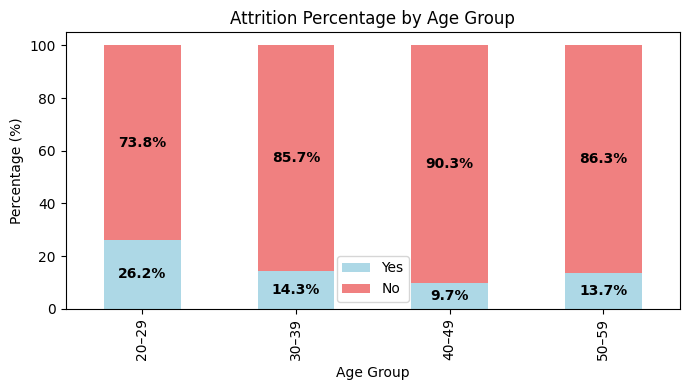

In [ ]:
# 📌 Exploration 4 – Attrition Percentage by Age Group

# Create age bins
bins = [20, 30, 40, 50, 60]
labels = ['20–29', '30–39', '40–49', '50–59']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate totals and attrition per age group
total_per_age = df['Age Group'].value_counts().sort_index()
attrition_counts = df[df['Attrition'] == 'Yes']['Age Group'].value_counts().sort_index()
no_attrition_counts = df[df['Attrition'] == 'No']['Age Group'].value_counts().sort_index()

# Combine into percentage DataFrame
plot_df = pd.DataFrame({
    'Yes': (attrition_counts / total_per_age * 100).round(1),
    'No': (no_attrition_counts / total_per_age * 100).round(1)
}).fillna(0)[['Yes', 'No']]

# Prepare for plotting
plot_df_percent = plot_df.reset_index().rename(columns={'index': 'Age Group'})

# Plot stacked bar chart
ax = plot_df_percent.set_index('Age Group').plot(
    kind='bar',
    stacked=True,
    color=['lightblue', 'lightcoral'],
    figsize=(7, 4)
)

plt.title('Attrition Percentage by Age Group')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')

# Add text annotations
for index, row in plot_df_percent.iterrows():
    ax.text(index, row['Yes']/2, f"{row['Yes']}%", ha='center', va='center', color='black', fontweight='bold')
    ax.text(index, row['Yes'] + row['No']/2, f"{row['No']}%", ha='center', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


## 📌 5. Attrition by Age Group

Attrition is clearly higher among younger employees:
- **26.2%** of those aged 20–29 leave
- Less than **10%** of those aged 40–49 leave

**Insight:**  
💡 Younger employees are more likely to leave, possibly due to career exploration, lack of engagement, or better opportunities.  
Retention strategies should focus on mentoring, career paths, and engagement for this age group.


This visual shosws that the attrition is highest amoung young employes aged 20- 29 years old. This trend may reflect early-career explorationn, job-hopping behaviour, or lack of term engagement strategies for new hires.


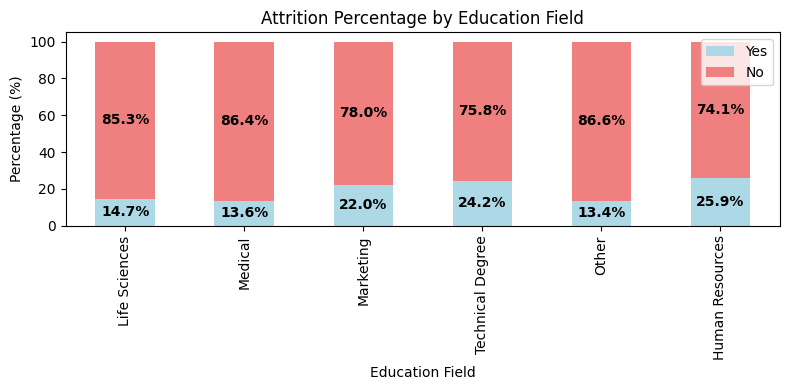

In [ ]:
#  Exploration 5 – Attrition by Education Field

# Calculate total and attrition counts per education field
total_per_field = df['EducationField'].value_counts()
attrition_counts = df[df['Attrition'] == 'Yes']['EducationField'].value_counts()
no_attrition_counts = df[df['Attrition'] == 'No']['EducationField'].value_counts()

# Create percentage DataFrame
plot_df = pd.DataFrame({
    'Yes': (attrition_counts / total_per_field * 100).round(1),
    'No': (no_attrition_counts / total_per_field * 100).round(1)
}).fillna(0)[['Yes', 'No']]

# Reset for plotting
plot_df_percent = plot_df.reset_index().rename(columns={'index': 'EducationField'})

# Plot
ax = plot_df_percent.set_index('EducationField').plot(
    kind='bar',
    stacked=True,
    color=['lightblue', 'lightcoral'],
    figsize=(8, 4)
)

plt.title('Attrition Percentage by Education Field')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Field')

# Add labels
for index, row in plot_df_percent.iterrows():
    ax.text(index, row['Yes']/2, f"{row['Yes']}%", ha='center', va='center', color='black', fontweight='bold')
    ax.text(index, row['Yes'] + row['No']/2, f"{row['No']}%", ha='center', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


## 📌 6. Attrition by Education Field

Employees with a **Human Resources** or **Technical Degree** background show higher attrition rates (over 24%).  
Meanwhile, those in **Medical** or **Life Sciences** have lower attrition (~13–15%).

**Insight:**  
💡 Certain education backgrounds may correlate with expectations or role satisfaction.  
This can help HR match candidates more effectively to the right positions.

<ipython-input-7-1123280263>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette=['lightblue', 'salmon'])


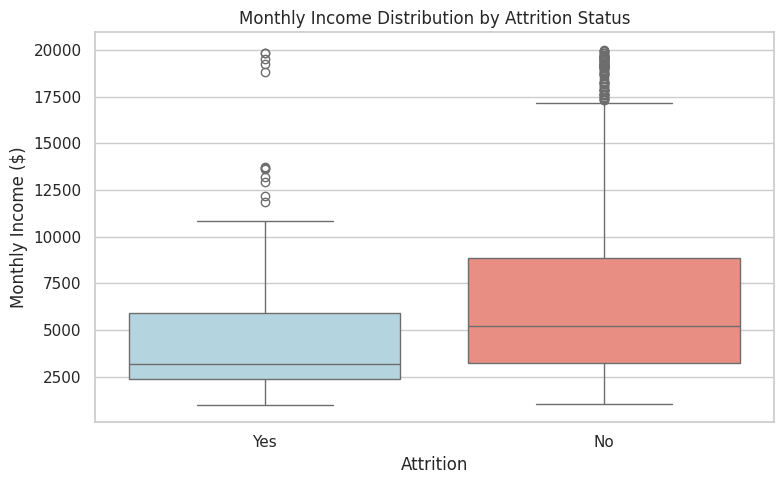

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette=['lightblue', 'salmon'])
plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income ($)')
plt.tight_layout()
plt.show()


## 📌 7. Monthly Income by Attrition Status (Boxplot)

The boxplot reveals that employees who left the company tend to earn less than those who stayed.

**Insight:**  
💡 Low compensation is a potential driver of attrition.  
Companies should monitor income distribution and consider targeted raises for lower-paid segments.


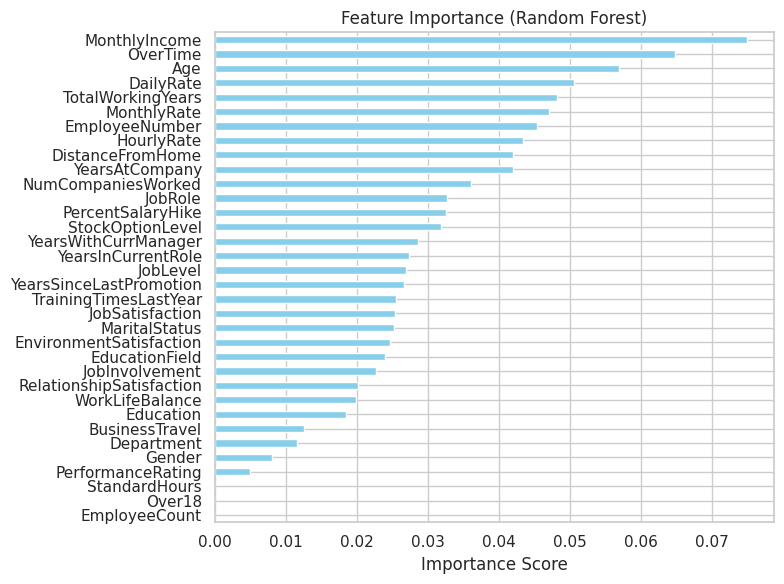

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Split data
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(8, 6))
importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


## 📌 8. Feature Importance (Random Forest Model)

The Random Forest algorithm identifies the most influential factors predicting attrition:

**Top features:**
- `MonthlyIncome`
- `OverTime`
- `Age`
- `TotalWorkingYears`

**Lower impact:** Department, Gender, Education

**Insight:**  
💡 Focus retention efforts on high-impact factors like fair pay, overtime workload, and career progression.


<ipython-input-9-3841431469>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=df, palette='pastel')


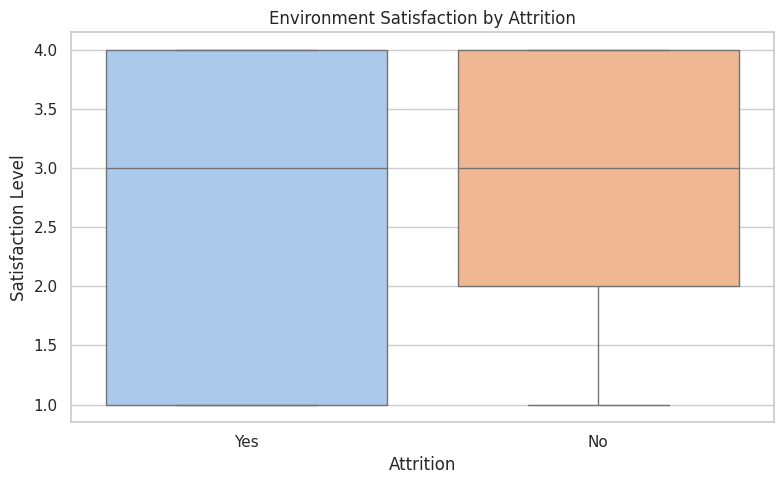

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=df, palette='pastel')
plt.title('Environment Satisfaction by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Satisfaction Level')
plt.tight_layout()
plt.show()


## 📌 9. Environment Satisfaction by Attrition

Both groups show similar medians (level 3), but employees who left are slightly more concentrated at **satisfaction level 1**.

**Insight:**  
💡 A poor work environment is a likely contributing factor.  
HR should explore environment-related feedback and act on early warning signs.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Already encoded and split above
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

# Print evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[248   7]
 [ 34   5]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.42      0.13      0.20        39

    accuracy                           0.86       294
   macro avg       0.65      0.55      0.56       294
weighted avg       0.82      0.86      0.83       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## ✅ Final Remarks

This analysis provides a holistic view of attrition dynamics:
- Young and underpaid employees are more likely to leave
- Department and overtime status play a key role
- Gender and education background have moderate impact
- Predictive modelling still needs enhancement to spot potential leavers early

A strong base for practical HR interventions and predictive retention strategies.